# --> 1. Explanatory Data Analysis and Feature Engineering

## Reading the dataset using pandas:

In [1]:
import pandas as pd

df = pd.read_csv("complaints.csv")
df.info(verbose=False, memory_usage="deep") #verbose is set to False to see the high level details of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060417 entries, 0 to 4060416
Columns: 18 entries, Date received to Complaint ID
dtypes: int64(1), object(17)
memory usage: 5.8 GB


# understanding the data

#### reading 5 random rows of dataframe

In [2]:
df.sample(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
855731,2022-04-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,WI,54923,NaN,Other,Web,2022-04-14,Closed with explanation,Yes,NaN,5450955
3265283,2012-10-03,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,11237,NaN,NaN,Web,2012-10-05,Closed with explanation,Yes,Yes,165306
640094,2019-10-24,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,The main 3 Credit Bureaus are attempting to ig...,NaN,"EQUIFAX, INC.",GA,30349,NaN,Consent provided,Web,2019-10-24,Closed with explanation,Yes,NaN,3416978
2847490,2020-05-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,DE,19701,NaN,NaN,Phone,2020-05-27,Closed with explanation,Yes,NaN,3669793
747198,2018-06-14,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,I have been working with this servicer for the...,Company has responded to the consumer and the ...,"SELECT PORTFOLIO SERVICING, INC.",CT,065XX,NaN,Consent provided,Web,2018-06-14,Closed with explanation,Yes,NaN,2935560


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060417 entries, 0 to 4060416
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 557.

#### Checking the shape of data

In [4]:
print("40 lakh 60 thousand four hundread and seventeen rows with 18 columns")
df.shape

40 lakh 60 thousand four hundread and seventeen rows with 18 columns


(4060417, 18)

#### Checking for any null values in the dataframe:

In [5]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        716132
Consumer complaint narrative    2590134
Company public response         2184984
Company                               0
State                             43203
ZIP code                          30210
Tags                            3635525
Consumer consent provided?       902243
Submitted via                         0
Date sent to company                  0
Company response to consumer          5
Timely response?                      0
Consumer disputed?              3292059
Complaint ID                          0
dtype: int64

### Check and drop the duplicated values if any

In [6]:
print("The duplicate values in the df is:",df.duplicated().sum())
print("we get 0 duplicated values here which is good so we are not dropping anything")

The duplicate values in the df is: 0
we get 0 duplicated values here which is good so we are not dropping anything


### Descriptive statistics for numerical columns

In [7]:
print("\nDescriptive statistics for numerical columns:")
print(df.describe())


Descriptive statistics for numerical columns:
       Complaint ID
count  4.060417e+06
mean   4.318300e+06
std    2.025607e+06
min    1.000000e+00
25%    2.870237e+06
50%    4.253436e+06
75%    6.140422e+06
max    7.540405e+06


### Descriptive statistics for categorical columns

In [8]:
print("\nDescriptive statistics for categorical columns:")
print(df.describe(include=["O"]))


Descriptive statistics for categorical columns:
       Date received                                            Product   
count        4060417                                            4060417  \
unique          4303                                                 21   
top       2023-08-08  Credit reporting, credit repair services, or o...   
freq            5136                                            2167414   

             Sub-product                                 Issue   
count            3825126                               4060417  \
unique                84                                   174   
top     Credit reporting  Incorrect information on your report   
freq             2184730                               1056122   

                                  Sub-issue   
count                               3344285  \
unique                                  265   
top     Information belongs to someone else   
freq                                 692979   

        

#### Finding the textual data column i.e Response Variable

In [9]:
print(df['Consumer complaint narrative'][67])

I had a XXXX  credit card with Commenity bank in XXXX to XXXX it closed and I havent dealt with this company since then. I filed bankruptcy and it was discharged XX/XX/XXXX, I called and advised them prior to it being filed and after filed given case number etc. They went on my report and filed a inquiry from XXXX as if I applied for an account and made remarks after knowing it was discharged with that causing my credit to be decreased and still having the inquiry on my report today. I have been calling company several times to ask them to remove inquiry she said she doesnt know why that was done and it will be fixed but still not fixed yet. Im calling but keep being transferred and spoken to in a rude manner and hung up on every time I call and put my number in it wont get answered and Im being penalized after doing everything legally.


#### All the textual data resides in the "Consumer complaint narrative" which has around 25,90,134 null values 
#### We drop those rows

In [10]:
initial_rows = df.shape[0]
print("Initial total number of rows",initial_rows)
df = df.dropna(subset=['Consumer complaint narrative'])
print("\nAfter droping the null values of 'Consumer complaint narrative' columns we are left with total number of rows:",df.shape[0])
print("\nTotal number of rows deleted is:",initial_rows-df.shape[0])

Initial total number of rows 4060417

After droping the null values of 'Consumer complaint narrative' columns we are left with total number of rows: 1470283

Total number of rows deleted is: 2590134


#### Checking unique values in the product column

In [11]:
df['Product'].unique()

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Mortgage', 'Vehicle loan or lease', 'Debt collection',
       'Credit reporting or other personal consumer reports',
       'Money transfer, virtual currency, or money service',
       'Checking or savings account', 'Credit card',
       'Payday loan, title loan, or personal loan', 'Prepaid card',
       'Credit card or prepaid card', 'Student loan',
       'Payday loan, title loan, personal loan, or advance loan',
       'Consumer Loan', 'Payday loan', 'Bank account or service',
       'Credit reporting', 'Money transfers', 'Other financial service',
       'Virtual currency', 'Debt or credit management'], dtype=object)

In [12]:
df['Product'].value_counts()

Product
Credit reporting, credit repair services, or other personal consumer reports    771245
Debt collection                                                                 218676
Mortgage                                                                        108212
Credit card or prepaid card                                                     105031
Checking or savings account                                                      75844
Student loan                                                                     35782
Money transfer, virtual currency, or money service                               33180
Credit reporting                                                                 31587
Vehicle loan or lease                                                            25543
Credit card                                                                      18915
Payday loan, title loan, or personal loan                                        16781
Bank account or service            

### We classify them into 4 category now

In [13]:
print("""We need to segreggate them as...
0 Credit reporting, repair, or
other
1 Debt collection
2 Consumer Loan
3 Mortgage
I have carefully sorted all the unique values of the product column""")

category_mapping = {
    'Credit reporting, credit repair services, or other personal consumer reports': 0,
    'Credit card or prepaid card': 0,
    'Credit reporting or other personal consumer reports': 0,
    'Credit card': 0,
    'Credit reporting': 0,
    'Other financial service': 0,
    'Money transfer, virtual currency, or money service': 0,
    'Prepaid card': 0,
    'Debt or credit management': 0,
    'Bank account or service': 0,
    'Money transfers': 0,
    'Virtual currency': 0,
    'Checking or savings account': 0,
    'Student loan': 2,
    'Payday loan, title loan, or personal loan': 2,
    'Vehicle loan or lease': 2,
    'Payday loan, title loan, personal loan, or advance loan': 2,
    'Payday loan': 2,
    'Consumer Loan': 2,
    'Mortgage': 3,
    'Debt collection' : 1
}

We need to segreggate them as...
0 Credit reporting, repair, or
other
1 Debt collection
2 Consumer Loan
3 Mortgage
I have carefully sorted all the unique values of the product column


In [14]:
print("We will create a new column having the values as 0, 1, 2, and 3 and name it as Category")

# Map the "Product" column to the category values using the dictionary
df['Category'] = df['Product'].map(category_mapping)

# Assign -1 for unmatched categories
df['Category'] = df['Category'].fillna(-1)

We will create a new column having the values as 0, 1, 2, and 3 and name it as Category


In [15]:
print("Now we have a new coulmn Category:")
df.head()

Now we have a new coulmn Category:


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Category
16,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,The existence of a derogatory rating on my acc...,Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,FL,33607,NaN,Consent provided,Web,2023-08-23,Closed with explanation,Yes,NaN,7442997,0
31,2023-08-14,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,XXXX XXXX is a rip-off company that never giv...,Company has responded to the consumer and the ...,Ocwen Financial Corporation,GA,30094,Older American,Consent provided,Web,2023-08-23,Closed with explanation,Yes,NaN,7399329,3
32,2023-08-07,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,"XXXX Mortgage XXXX XXXX XXXX XXXX XXXX, NJ XXX...",Company has responded to the consumer and the ...,Ocwen Financial Corporation,TX,77545,NaN,Consent provided,Web,2023-08-23,Closed with explanation,Yes,NaN,7364084,3
39,2023-07-22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,1 reviewed my Consumer Reports and noticed tha...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75159,NaN,Consent provided,Web,2023-07-22,Closed with explanation,Yes,NaN,7291284,0
61,2023-07-22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,I have been fighting for the last two years to...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AR,72204,NaN,Consent provided,Web,2023-07-22,Closed with non-monetary relief,Yes,NaN,7291424,0


In [16]:
print("All the unqiue values in Category are:")
df['Category'].unique()

All the unqiue values in Category are:


array([0, 3, 2, 1], dtype=int64)

In [17]:
print("This is how the class looks like:\n",df['Category'].value_counts())
print("\nWe can see we have class imbalance We must go for downsampling of dataset:")

This is how the class looks like:
 Category
0    1054076
1     218676
3     108212
2      89319
Name: count, dtype: int64

We can see we have class imbalance We must go for downsampling of dataset:


### Category visualiozation

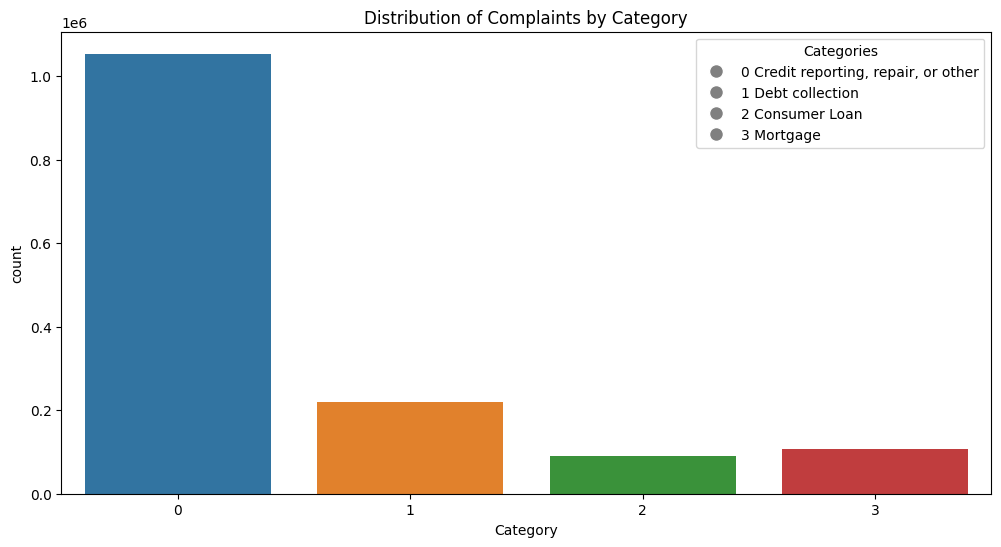

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a vertical count plot
plt.figure(figsize=(12,6))
ax = sns.countplot(x=df['Category'])

# Add title
plt.title('Distribution of Complaints by Category')

# Define legend labels
legend_labels = {
    0: "0 Credit reporting, repair, or other",
    1: "1 Debt collection",
    2: "2 Consumer Loan",
    3: "3 Mortgage"
}

# Create custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10) for _ in legend_labels.values()]
plt.legend(handles, list(legend_labels.values()), title="Categories", loc="upper right")

plt.show()


### We go for downsampling of the data

In [24]:
print("Storing all the values as a df for each of the conditions")
df_0 = df[df['Category'] == 0]
df_1 = df[df['Category'] == 1]
df_2 = df[df['Category'] == 2]
df_3 = df[df['Category'] == 3]

Storing all the values as a df for each of the conditions


In [25]:
print("Storing the length of each class present in Category column:\n")
print("For reference:\n",df.Category.value_counts())
count_0, count_1, count_3, count_2 = df.Category.value_counts()
count_0, count_1, count_3, count_2

Storing the length of each class present in Category column:

For reference:
 Category
0    1054076
1     218676
3     108212
2      89319
Name: count, dtype: int64


(1054076, 218676, 108212, 89319)

In [26]:
print("Randomly selecting count_2 i.e 89319 values from the new df create to ensure all class have same length")
class_0 = df_0.sample(count_2)
class_1 = df_1.sample(count_2)
class_3 = df_3.sample(count_2)
class_0.shape,class_1.shape,class_3.shape

Randomly selecting count_2 i.e 89319 values from the new df create to ensure all class have same length


((89319, 19), (89319, 19), (89319, 19))

In [27]:
print("Now we concat each df into new df:")
underSampling_df = pd.concat([class_0,class_1,df_2,class_3], axis=0)
underSampling_df['Category'].value_counts()

Now we concat each df into new df:


Category
0    89319
1    89319
2    89319
3    89319
Name: count, dtype: int64

In [28]:
print("This is the new shape of the df:\nIt has 3 lakh fifty seven two hundred and sevenety six rows and 19 columns")
underSampling_df.shape

This is the new shape of the df:
It has 3 lakh fifty seven two hundred and sevenety six rows and 19 columns


(357276, 19)

In [29]:
underSampling_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Category
3496847,2022-04-28,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,NaN,"EQUIFAX, INC.",NC,28027,NaN,Consent provided,Web,2022-04-28,Closed with explanation,Yes,NaN,5509552,0
442427,2022-02-15,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,An itemized bill does not imply that the debt ...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NJ,07305,NaN,Consent provided,Web,2022-02-15,Closed with explanation,Yes,NaN,5225983,0
3092575,2023-06-26,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,NaN,"EQUIFAX, INC.",AR,723XX,NaN,Consent provided,Web,2023-06-26,Closed with non-monetary relief,Yes,NaN,7166101,0
1465252,2015-07-08,Credit card,NaN,Delinquent account,NaN,I 've had this Bank of America credit card sin...,Company chooses not to provide a public response,"BANK OF AMERICA, NATIONAL ASSOCIATION",MD,217XX,NaN,Consent provided,Web,2015-07-08,Closed with monetary relief,Yes,Yes,1457482,0
285499,2019-01-08,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,XXXX XXXX / XXXX XXXX XXXX WENT ON MY TRANSUNI...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TN,37066,NaN,Consent provided,Web,2019-01-08,Closed with explanation,Yes,NaN,3119354,0


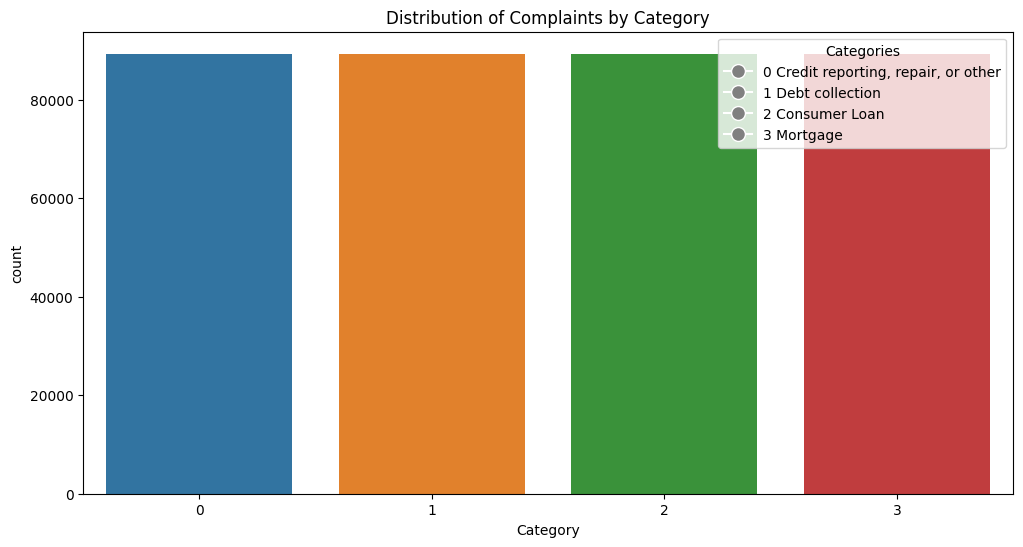

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a vertical count plot
plt.figure(figsize=(12,6))
ax = sns.countplot(x=underSampling_df['Category'])

# Add title
plt.title('Distribution of Complaints by Category')

# Define legend labels
legend_labels = {
    0: "0 Credit reporting, repair, or other",
    1: "1 Debt collection",
    2: "2 Consumer Loan",
    3: "3 Mortgage"
}

# Create custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10) for _ in legend_labels.values()]
plt.legend(handles, list(legend_labels.values()), title="Categories", loc="upper right")

plt.show()


### Now the class is balanced after performing downsampling of dataset

# -> 2. Text Pre-Processing

### Now we create a new dataframe

In [32]:
underSampling_df = df[['Consumer complaint narrative','Category']]

In [33]:

import spacy
import re

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

def text_Cleaning(text):
    pattern = r'(XX/XX/\d{4}|XXXX|XX|\W|\d)+'  
    text = re.sub(pattern, " ", text)
    text = text.lower().strip()
    doc = nlp(text)
    text = ' '.join([token.lemma_ for token in doc if not token.is_stop])

    return text

In [34]:
# text ="""'In XX/XX/XXXX I bought my first home, a townhouse in XXXX, MA. The mortgage was an adjustable rate, interest only, no income verification with server refinance penalties. Originally the loan was though XXXX XXXX, but latter taken over by Wells Fargo. Knowing what I know now, I should have never been put in such a mortgage. My credit score was XXXX and I had a good paying job with the ability to put down 20 %. It took a year before the reality of this mortgage came to light. To make matters worse the automobile industry went through great financial trouble and my position was eliminated.\n\nThe next decade was a series of negotiations with Wells Fargo and trying to take advantage of various government programs with minimal success. At one point it appeared I qualified for HARP only to have Wells Fargo come back a few years later and tell is was a mistake. As a result, I had to pay back any monies taken off the mortgage and incurred a number of fees. Even the one refinance the bank did grant ended with a payment higher than previous one.\n\nThen sometime in XX/XX/XXXX a foreclosure notice arrived at my home. Not knowing what to do, I sought counsel from XXXX XXXX in XXXX, MA. Mr. XXXX recommended Chapter XXXX Bankruptcy. The total monthly payments were extremely high at about {$4500.00} per a month. The payback payments were more than the original mortgage payment. It was simply too much to handle and Mr. XXXX advised to withdraw from the bankruptcy in XX/XX/XXXX before it was confirmed. He instructed doing so would guarantee reimbursement of any payments made. As of XX/XX/XXXX, I have not received any monies even though I have asked Mr. XXXX about this matter on several occasions.\n\nShortly after Mr. XXXX withdrew the Chapter XXXX   Bankruptcy, I contacted Wells Fargo about a short sale and was told I qualified for one. At no time did Wells Fargo disclose there were specific guidelines and procedures for a short sale. I requested information and any accompanying paper work to file for a short sale, but never received any such documents from Wells Fargo.\n\nWithin two months after dismissing out of Chapter XXXX  Bankruptcy, a second foreclosure noticed arrived. At this point, it was clear a short sale was my best option. I went back to XXXX XXXX for advice. His advice was to file a second Chapter XXXX Bankruptcy. He instructed me I had to file bankruptcy now to save the home and that I could NOT do a short sale when the home was under foreclosure. He told me I could do the short sale later after the bankruptcy and that I could NOT do a short sale while in bankruptcy.\n\nMr. XXXX  dismissed me out of the Chapter XXXX Bankruptcy before the court date on XX/XX/XXXX. I am not sure of the exact date, because he did not contact me. I found out though my husband. From what I understand Mr. XXXX spoke to my husband over the phone and told him he was going to dismiss the Chapter XXXX Bankruptcy. If I had to guess, it was sometime shortly after our meeting on XX/XX/XXXX, where Mr. XXXX  was paid.\n\nOn Friday XX/XX/XXXX a third foreclosure notice arrived and on Monday XX/XX/XXXX I spoke to Well Fargo and was told I had to request a short sale 37 days prior to the foreclosure day. The foreclosure is scheduled for XX/XX/XXXX, making my request about 5 days short.\n\nThis information was devastating and surprising. Both Wells Fargo and Mr. XXXX neglected to inform me of this critical 37 day rule along with other critical information. After consulting a second counsel, it can be argued with confidence Mr. XXXX did misinform and misguided me.\n\nCurrently, my home will be foreclosed on XX/XX/XXXX and I missed the short sale request by 5 days. After paying XXXX XXXX {$7700.00} and not receiving my payments back from the courts for {$5000.00}, my situation is frustrating and has caused great distress in my life. If I had received better counsel there is no doubt my situation would be different.'
# """
text = 'I love YT leacture ans ML videos!'

ans = text_Cleaning(text)
print(type(ans),"\n",ans)

<class 'str'> 
 love yt leacture ans ml video


In [119]:
underSampling_df['Spacy_preProcessed_Complaints'] = df['Consumer complaint narrative'].apply(text_Cleaning)

In [121]:
underSampling_df.sample(5)

,Category,Consumer complaint narrative,Spacy_preProcessed_Complaints
1119784,2,"XXXX XXXX, XXXX RE : Swindling consumers selli...",swindle consumer sell broken car consumer mone...
1361280,2,") In an effort to make sure we are covered, I ...",effort sure cover send complaint situation bbv...
3579534,0,Throughout the pandemic I made great efforts t...,pandemic great effort payment credit card rema...
1902835,0,I obtained my free credit report and noticed a...,obtain free credit report notice credit card r...
3821778,0,I was under covid forbearance with XXXXXXXX XX...,covid forbearance prior loan modification exec...


## Save the DataFrame with selected columns to a CSV file

In [123]:
underSampling_df.to_csv('Complaints_SpacyProcessed.csv', index=False)